In [1]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv -O Netflix_Case.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/Netflix_Case.csv
100% 3.40M/3.40M [00:00<00:00, 130MB/s]



# 1. Importing Libraries , Loading the data and Basic Observations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Netflix_Case.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Problem Statement:

Netflix, as a leading media streaming platform, seeks to identify the types of shows and movies that will appeal to audiences across different countries, enabling continued global growth. To make data-driven decisions, Netflix needs to understand the content trends in various regions by analyzing its extensive dataset of TV shows and movies. This analysis will focus on answering the following key questions:

1. **What type of content is available in different countries?**
2. **How has the number of movies released per year changed over the last 20-30 years?**
3. **What is the comparison between TV shows and movies?**
4. **What is the best time to launch a TV show?**
5. **Which actors and directors are associated with different types of shows and movies?**
6. **Has Netflix shifted its focus toward TV shows more than movies in recent years?**

By addressing these questions, We can develop insights that will help in deciding the types of content to produce and refine strategies to grow its business across various countries. The findings will assist Netflix in tailoring its content to specific markets, optimizing production schedules, and aligning content offerings with regional preferences.

In [4]:
# Basic information of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Shape of the dataset
df.shape

(8807, 12)

In [7]:
# Data types of each Column
df.nunique()


,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


These are total features of our dataset. It is seen that show_id column has all unique values, Title column has all unique values i.e. total 8807 which equates with total rows in the dataset. Hence It can be concluded that ,

Total 8807 movies/TV shows data is provided in the dataset.

In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Only single column having numerical values. It gives idea of release year of the content ranges between what timeframe. Rest all the columns are having categorical data.

In [9]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


# 2. Data Cleaning


In [10]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


3 missing values are found in duration column , and it is also found that by mistake those data got entered in rating column


In [11]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [12]:
id = df[df['duration'].isna()].index
df.loc[id] = df.loc[id].fillna(method = 'ffill', axis=1)
# Filled the Nan dureation rows with its duration wrongly placed in rating by ffil method

In [13]:
df.loc[id, 'rating'] = 'Not available'
# replaced the wrong entries done in the rating column

In [14]:
df.loc[id]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not available,66 min,Movies,The comic puts his trademark hilarious/thought...


In [15]:
df[df['rating'].isna()]
ir = df[df['rating'].isna()].index
df.loc[ir, 'rating'] = 'Not available'
df.loc[ir]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,Not available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [16]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Not available', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

In [17]:
#In rating column , NR (Not rated) is same as UR (Unrated). lets change UR to NR.
df.loc[df['rating'] == 'UR', 'rating'] = 'NR'
df.rating.value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [18]:
df.drop(df.loc[df['date_added'].isna()].index, axis=0, inplace=True)
df['date_added'].value_counts()

,count
date_added,
"January 1, 2020",109
"November 1, 2019",89
"March 1, 2018",75
"December 31, 2019",74
"October 1, 2018",71
...,...
"December 4, 2016",1
"November 21, 2016",1
"November 19, 2016",1


For 'date_added' column, all values confirm to date format, So we can convert its data type from object to datetime



In [19]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added']

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24
...,...
8802,2019-11-20
8803,2019-07-01
8804,2019-11-01
8805,2020-01-11


In [20]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df[['year_added', 'month_added', 'date_added']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   year_added   8797 non-null   int32         
 1   month_added  8797 non-null   int32         
 2   date_added   8797 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(2)
memory usage: 206.2 KB



We can add the new columns 'year_added' & 'month_added' by extracting the year & month from 'date_added' column

In [21]:
df.isna().sum()
round(df.isna().sum()/df.shape[0]*100, 0)

,0
show_id,0.0
type,0.0
title,0.0
director,30.0
cast,9.0
country,9.0
date_added,0.0
release_year,0.0
rating,0.0
duration,0.0


% of Null values

We can see that, after cleaning some data we still have null values in 3 columns. These are much higher in numbers.

For some content - country is missing. (9%)

for some content - director names are missing (30%)

for some content - cast is missing (9%)

#3. Data Exploration and Non Graphical Analysis




In [22]:
# 2 types of content present in dataset - either Movie or TV Show
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [23]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

In [24]:
movies.duration.value_counts()

,count
duration,
90 min,152
94 min,146
97 min,146
93 min,146
91 min,144
...,...
208 min,1
5 min,1
16 min,1


In [25]:
tv_shows.duration.value_counts()


,count
duration,
1 Season,1793
2 Seasons,421
3 Seasons,198
4 Seasons,94
5 Seasons,64
6 Seasons,33
7 Seasons,23
8 Seasons,17
9 Seasons,9


Since movie and TV shows both have different format for duration, we can change duration for movies as minutes & TV shows as seasons



In [26]:
movies['duration'] = movies['duration'].str[:-3]
movies['duration'] = movies['duration'].astype('float')

In [27]:
tv_shows['duration'] = tv_shows.duration.str[:-7].apply(lambda x : x.strip())
tv_shows['duration'] = tv_shows['duration'].astype('float')

In [28]:
tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)
movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)

when was first movie added on netflix and when is the most recent movie added on netflix as per data i.e. dataset duration



In [29]:
timeperiod = pd.Series((df['date_added'].min().strftime('%B %Y') , df['date_added'].max().strftime('%B %Y')))
timeperiod.index = ['first' , 'Most Recent']
timeperiod

,0
first,January 2008
Most Recent,September 2021


In [30]:
#The oldest and the most recent movie/TV show released on the Netflix in which year?
df.release_year.min() , df.release_year.max()

(1925, 2021)

In [31]:
df.loc[(df.release_year == df.release_year.min()) | (df.release_year == df.release_year.max())].sort_values('release_year')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,2018,12
966,s967,Movie,Get the Grift,Pedro Antonio,"Marcus Majella, Samantha Schmütz, Caito Mainie...",Brazil,2021-04-28,2021,TV-MA,95 min,"Comedies, International Movies","After a botched scam, Clóvis bumps into Lohane...",2021,4
967,s968,TV Show,Headspace Guide to Sleep,NaN,Evelyn Lewis Prieto,NaN,2021-04-28,2021,TV-G,1 Season,"Docuseries, Science & Nature TV",Learn how to sleep better with Headspace. Each...,2021,4
968,s969,TV Show,Sexify,NaN,"Aleksandra Skraba, Maria Sobocińska, Sandra Dr...",Poland,2021-04-28,2021,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",To build an innovative sex app and win a tech ...,2021,4
972,s973,TV Show,Fatma,NaN,"Burcu Biricik, Uğur Yücel, Mehmet Yılmaz Ak, H...",Turkey,2021-04-27,2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers","Reeling from tragedy, a nondescript house clea...",2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,s467,TV Show,My Unorthodox Life,NaN,NaN,NaN,2021-07-14,2021,TV-MA,1 Season,Reality TV,"Follow Julia Haart, Elite World Group CEO and ...",2021,7
467,s468,Movie,Private Network: Who Killed Manuel Buendía?,Manuel Alcalá,Daniel Giménez Cacho,NaN,2021-07-14,2021,TV-MA,100 min,"Documentaries, International Movies",A deep dive into the work of renowned Mexican ...,2021,7
468,s469,Movie,The Guide to the Perfect Family,Ricardo Trogi,"Louis Morissette, Émilie Bierre, Catherine Cha...",NaN,2021-07-14,2021,TV-MA,102 min,"Comedies, Dramas, International Movies","A couple in Québec deals with the pitfalls, pr...",2021,7
471,s472,Movie,Day of Destiny,"Akay Mason, Abosi Ogba","Olumide Oworu, Denola Grey, Gbemi Akinlade, Ji...",NaN,2021-07-13,2021,TV-PG,110 min,"Children & Family Movies, Dramas, Internationa...","With their family facing financial woes, two t...",2021,7


In [32]:
#Which are different ratings available on Netflix in each type of content? Check the number of content released in each type.

df.groupby(['type' , 'rating'])['show_id'].count()


type     rating       
Movie    G                  41
         NC-17               3
         NR                 78
         Not available       5
         PG                287
         PG-13             490
         R                 797
         TV-14            1427
         TV-G              126
         TV-MA            2062
         TV-PG             540
         TV-Y              131
         TV-Y7             139
         TV-Y7-FV            5
TV Show  NR                  4
         Not available       2
         R                   2
         TV-14             730
         TV-G               94
         TV-MA            1143
         TV-PG             321
         TV-Y              175
         TV-Y7             194
         TV-Y7-FV            1
Name: show_id, dtype: int64

In [33]:
# Working on the columns having maximum null values and the columns having comma separated multiple values for each record
df['country'].value_counts()


,count
country,
United States,2812
India,972
United Kingdom,418
Japan,244
South Korea,199
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1


We see that many movies are produced in more than 1 country. Hence, the country column has comma separated values of countries.

This makes it difficult to analyse how many movies were produced in each country. We can use explode function in pandas to split the country column into different rows.

we are Creating a separate table for country , to avoid the duplicasy of records in our origional table after exploding.

In [34]:
country_tb = df[['show_id' , 'type' , 'country']]
country_tb.dropna(inplace = True)
country_tb['country'] = country_tb['country'].apply(lambda x : x.split(','))
country_tb = country_tb.explode('country')
country_tb

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [35]:
# some duplicate values are found, which have unnecessary spaces. some empty strings found
country_tb['country'] = country_tb['country'].str.strip()

In [36]:
country_tb.loc[country_tb['country'] == '']

,show_id,type,country
193,s194,TV Show,
365,s366,Movie,
1192,s1193,Movie,
2224,s2225,Movie,
4653,s4654,Movie,
5925,s5926,Movie,
7007,s7008,Movie,


In [37]:
country_tb = country_tb.loc[country_tb['country'] != '']
country_tb['country'].nunique()

122

Netflix has movies from the total 122 countries.

Total movies and tv shows in each country

In [38]:
x = country_tb.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752.0,932.0
India,962.0,84.0
United Kingdom,534.0,271.0
Canada,319.0,126.0
France,303.0,90.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


lets clean director column

In [39]:
df['director'].value_counts()

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
...,...
"Raymie Muzquiz, Stu Livingston",1
Joe Menendez,1
Eric Bross,1


There are some movies which are directed by multiple directors. Hence multiple names of directors are given in comma separated format. We will explode the director column as well. It will create many duplicate records in originaltable hence we created separate table for directors.

In [40]:
dir_tb = df[['show_id' , 'type' , 'director']]
dir_tb.dropna(inplace = True)
dir_tb['director'] = dir_tb['director'].apply(lambda x : x.split(','))
dir_tb = dir_tb.explode('director')
dir_tb

,show_id,type,director
0,s1,Movie,Kirsten Johnson
2,s3,TV Show,Julien Leclercq
5,s6,TV Show,Mike Flanagan
6,s7,Movie,Robert Cullen
6,s7,Movie,José Luis Ucha
...,...,...,...
8801,s8802,Movie,Majid Al Ansari
8802,s8803,Movie,David Fincher
8804,s8805,Movie,Ruben Fleischer
8805,s8806,Movie,Peter Hewitt


In [41]:
# some duplicate values are found, which have unnecessary spaces. some empty strings found
dir_tb['director'] = dir_tb['director'].str.strip()

In [42]:
dir_tb.loc[dir_tb['director'] == '']
dir_tb

,show_id,type,director
0,s1,Movie,Kirsten Johnson
2,s3,TV Show,Julien Leclercq
5,s6,TV Show,Mike Flanagan
6,s7,Movie,Robert Cullen
6,s7,Movie,José Luis Ucha
...,...,...,...
8801,s8802,Movie,Majid Al Ansari
8802,s8803,Movie,David Fincher
8804,s8805,Movie,Ruben Fleischer
8805,s8806,Movie,Peter Hewitt


In [43]:
dir_tb['director'].nunique()

4993

There are total 4993 unique directors in the dataset.

Total movies and tv shows directed by each director

In [44]:
x = dir_tb.groupby(['director' , 'type'])['show_id'].count().reset_index()
x.pivot(index= ['director'] , columns = 'type' , values = 'show_id').sort_values('Movie' ,ascending = False)

type,Movie,TV Show
director,,
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


cleaning the listed_in column

In [45]:
genre_tb = df[['show_id' , 'type', 'listed_in']]
genre_tb

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,"Docuseries, Reality TV"
4,s5,TV Show,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...
8802,s8803,Movie,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,"Comedies, Horror Movies"
8805,s8806,Movie,"Children & Family Movies, Comedies"


In [46]:
genre_tb = df[['show_id' , 'type' , 'listed_in']]
genre_tb.dropna(inplace = True)
genre_tb['listed_in'] = genre_tb['listed_in'].apply(lambda x : x.split(','))
genre_tb = genre_tb.explode('listed_in')
genre_tb['listed_in'] = genre_tb['listed_in'].str.strip()
genre_tb

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [47]:
genre_tb.loc[genre_tb['listed_in'] == '']
genre_tb

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [48]:
genre_tb.listed_in.unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [49]:
genre_tb.listed_in.nunique()

42

In [50]:
x = genre_tb.groupby(['listed_in' , 'type'])['show_id'].count().reset_index()
x.pivot(index= ['listed_in'] , columns = 'type' , values = 'show_id').sort_index()

type,Movie,TV Show
listed_in,,
Action & Adventure,859.0,NaN
Anime Features,71.0,NaN
Anime Series,NaN,175.0
British TV Shows,NaN,252.0
Children & Family Movies,641.0,NaN
Classic & Cult TV,NaN,26.0
Classic Movies,116.0,NaN
Comedies,1674.0,NaN
Crime TV Shows,NaN,469.0


In [51]:
cast_tb = df[['show_id' , 'type' ,'cast']]
cast_tb.dropna(inplace = True)
cast_tb['cast'] = cast_tb['cast'].apply(lambda x : x.split(','))
cast_tb = cast_tb.explode('cast')
cast_tb

,show_id,type,cast
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
1,s2,TV Show,Dillon Windvogel
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [52]:
cast_tb['cast'] = cast_tb['cast'].str.strip()

In [53]:
# checking empty strings
cast_tb[cast_tb['cast'] == '']

,show_id,type,cast


In [54]:
# Total actors on the Netflix
cast_tb.cast.nunique()

36403

In [55]:
# Total movies/TV shows by each actor
x = cast_tb.groupby(['cast' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_values('TV Show' , ascending = False)

type,Movie,TV Show
cast,,
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Junichi Suwabe,4.0,17.0
Daisuke Ono,5.0,17.0
Ai Kayano,2.0,17.0
...,...,...
Şerif Sezer,1.0,NaN
Şevket Çoruh,1.0,NaN
Şinasi Yurtsever,3.0,NaN



# 4. Visual Analysis - Univariate & Bivariate

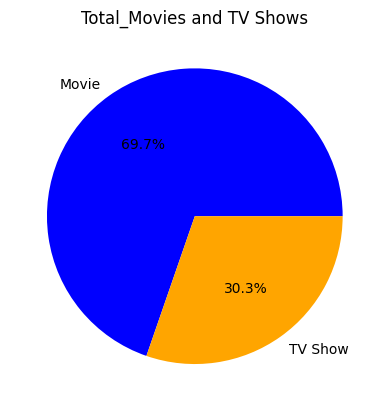

In [56]:
types = df.type.value_counts()
plt.pie(types,  labels=types.index, autopct='%1.1f%%' , colors = ['blue' , 'orange'])
plt.title('Total_Movies and TV Shows')
plt.show()

it is observed that , around 70% content is Movies and around 30% content is TV shows.



In [57]:
#4.2 Distribution of 'date_added' column.
#How has the number of movies/TV shows added on Netflix per year changed over the time?

d = df.groupby(['year_added' ,'type' ])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)

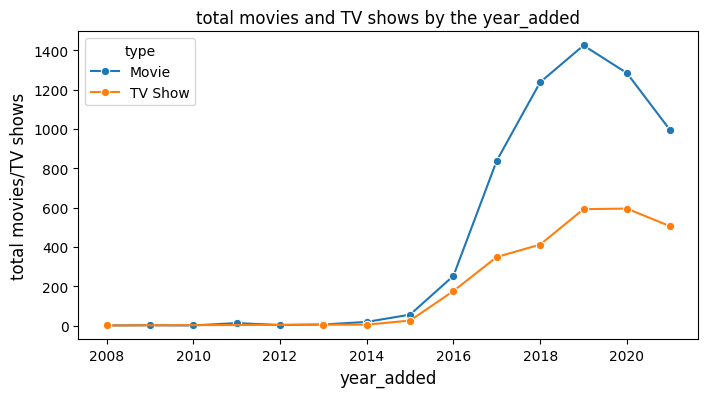

In [58]:
plt.figure(figsize = (8,4))
sns.lineplot(data = d , x = 'year_added' , y = 'total movies/TV shows' , hue = 'type', marker = 'o'  , ms = 6)
plt.xlabel('year_added' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the year_added' , fontsize = 12)
plt.show()

Observation:

The content added on the Netflix surged drastically after 2015.
2019 marks the highest number of movies and TV shows added on the Netflix.
Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies. In recent years TV shows are focussed more than Movies.


In [59]:
# 4.3 How has the number of movies released per year changed over the last 20-30 years?
d = df.groupby(['type' , 'release_year'])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)
d


,type,release_year,total movies/TV shows
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,379
116,TV Show,2019,397
117,TV Show,2020,436


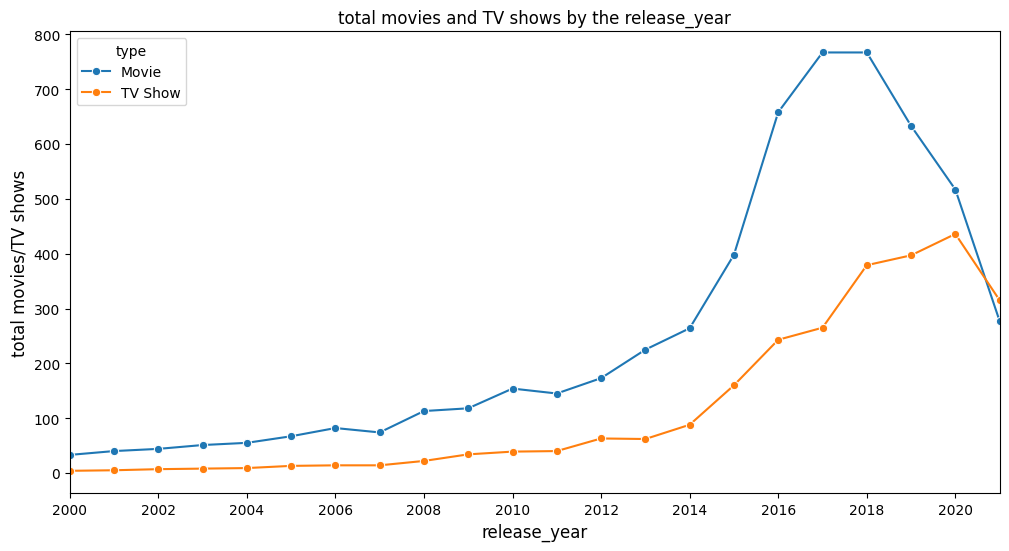

In [60]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'release_year' , y = 'total movies/TV shows' , hue = 'type' , marker = 'o'  , ms = 6 )
plt.xlabel('release_year' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the release_year' , fontsize = 12)
plt.xlim( left = 2000 , right = 2021)
plt.xticks(np.arange(2000 , 2021 , 2))
plt.show()

2018 marks the highest number of movie and TV show releases.
Since 2018, A drop in movies is seen and rise in TV shows is observed clearly, and TV shows surpasses the movies count in mid 2020.
In recent years TV shows are focussed more than Movies.
The yearly number of releases has surged drastically from 2015.

In [61]:
# 4.4 Total movies/TV shows by each director
# total Movies directed by top 10 directors
top_10_dir = dir_tb.director.value_counts().head(10).index
df_new = dir_tb.loc[dir_tb['director'].isin(top_10_dir)]

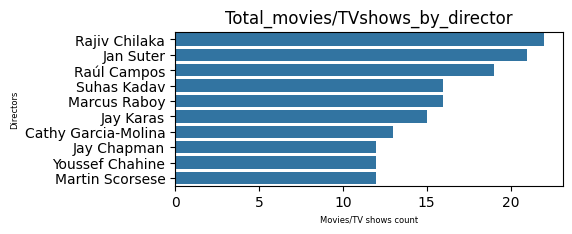

In [62]:
plt.figure(figsize= (5 , 2))
sns.countplot(data = df_new , y = 'director' , order = top_10_dir)
plt.xlabel('total_movies/TV shows' , fontsize = 6)
plt.xlabel('Movies/TV shows count')
plt.ylabel('Directors' , fontsize = 6)
plt.title('Total_movies/TVshows_by_director')
plt.show()

Observation:

The top 3 directors on Netflix in terms of count of movies directed by them are - Rajiv Chilaka, Jan Suter, Raúl Campos


In [63]:
# 4.4 Total movies/TV shows by each country

# Lets check for top 10 countries
top_10_country = country_tb.country.value_counts().head(10).index
df_new = country_tb.loc[country_tb['country'].isin(top_10_country)]
x = df_new.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752,932
India,962,84
United Kingdom,534,271
Canada,319,126
France,303,90
Germany,182,44
Spain,171,61
Japan,119,198
Mexico,111,58


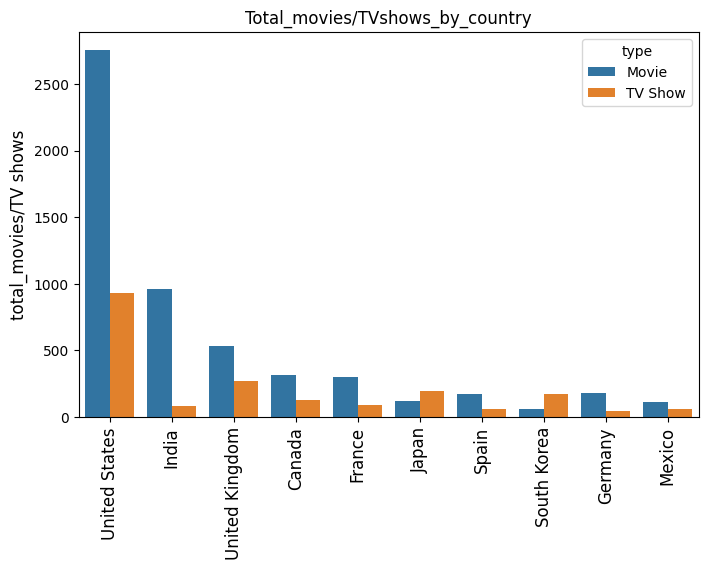

In [64]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

In [65]:
top_10_country = country_tb.country.value_counts().head(10).index
country_tb['cat'] = country_tb['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

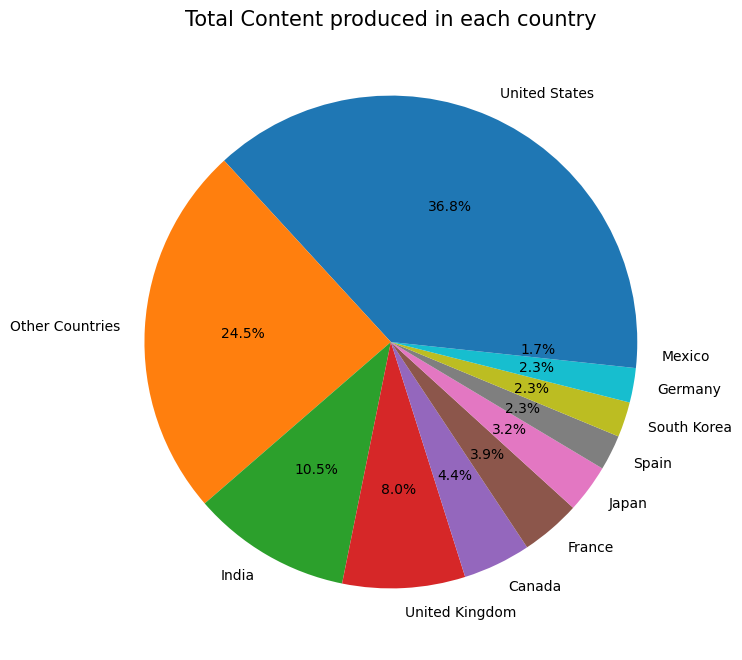

In [66]:
x = country_tb.cat.value_counts()

plt.figure(figsize = (8,8))
plt.pie(x , labels = x.index, autopct='%1.1f%%')
plt.title('Total Content produced in each country' , fontsize = 15)
plt.show()

Observation:
United States is the HIGHEST contributor country on Netflix, followed by India and United Kingdom.
Maximum content of Netflix which is around 75% , is coming from these top 10 countries. Rest of the world only contributes 25% of the content.

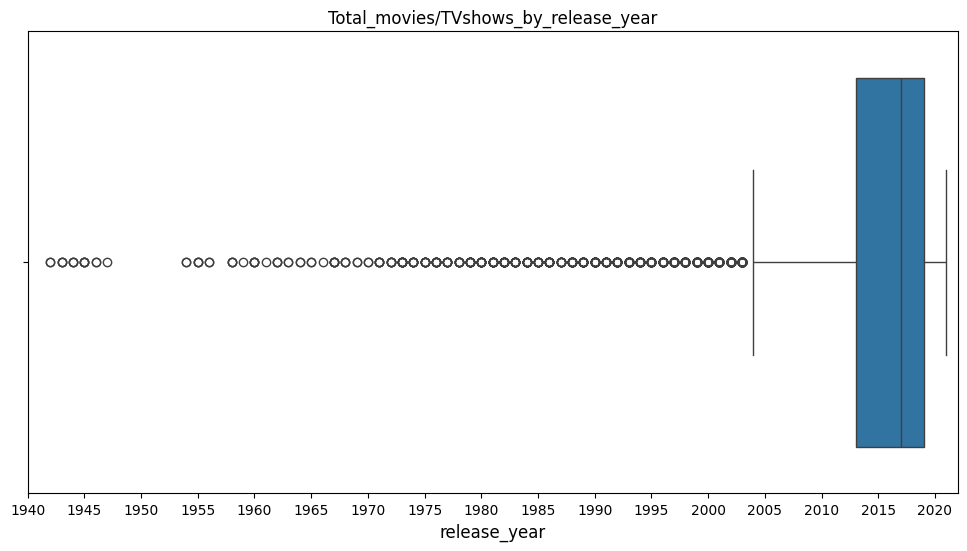

In [67]:
#4.6 Total content distribution by release year of the content
plt.figure(figsize= (12,6))
sns.boxplot(data = df , x = 'release_year')
plt.xlabel('release_year' , fontsize = 12)
plt.title('Total_movies/TVshows_by_release_year')
plt.xticks(np.arange(1940 , 2021 , 5))
plt.xlim((1940 , 2022))
plt.show()

Netflix have major content which is released in the year range 2000-2021
It seems that the content older than year 2000 is almost missing from the Netflix.


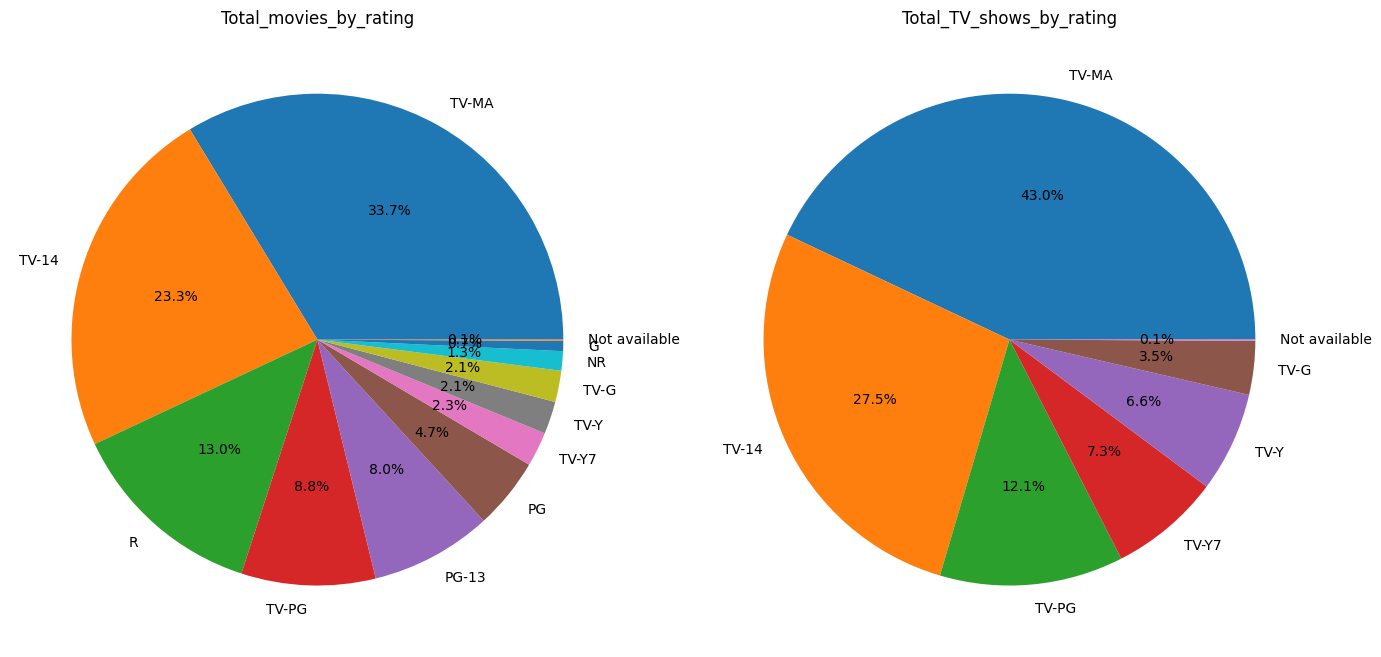

In [68]:
# 4.7 Total movies/TV shows distribution by rating of the content
m = movies.loc[~movies.rating.isin(['Not Available' , 'NC-17' , 'TV-Y7-FV'])]
m = m.rating.value_counts()
t = tv_shows.loc[~tv_shows.rating.isin(['Not Available' , 'R' , 'NR', 'TV-Y7-FV'])]
t = t.rating.value_counts()


fig, ax = plt.subplots(1,2, figsize=(14,8))
ax[0].pie(m , labels = m.index, autopct='%1.1f%%')
ax[0].set_title('Total_movies_by_rating')

ax[1].pie(t , labels = t.index, autopct='%1.1f%%')
ax[1].set_title('Total_TV_shows_by_rating')

plt.tight_layout()
plt.show()

Highest number of movies and TV shows are rated TV-MA (for mature audiences), followed by TV-14 & R/TV-PG



# 5. Bivariate Analysis

In [69]:
#5.1 Lets check popular genres in top 20 countries
top_20_country = country_tb.country.value_counts().head(20).index
top_20_country = country_tb.loc[country_tb['country'].isin(top_20_country)]
x = top_20_country.merge(genre_tb , on = 'show_id').drop_duplicates()


In [70]:
country_genre = x.groupby([ 'country' , 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in' , columns = 'country' , values = 'show_id')



Text(0.5, 1.0, 'Countries V/s Genres')

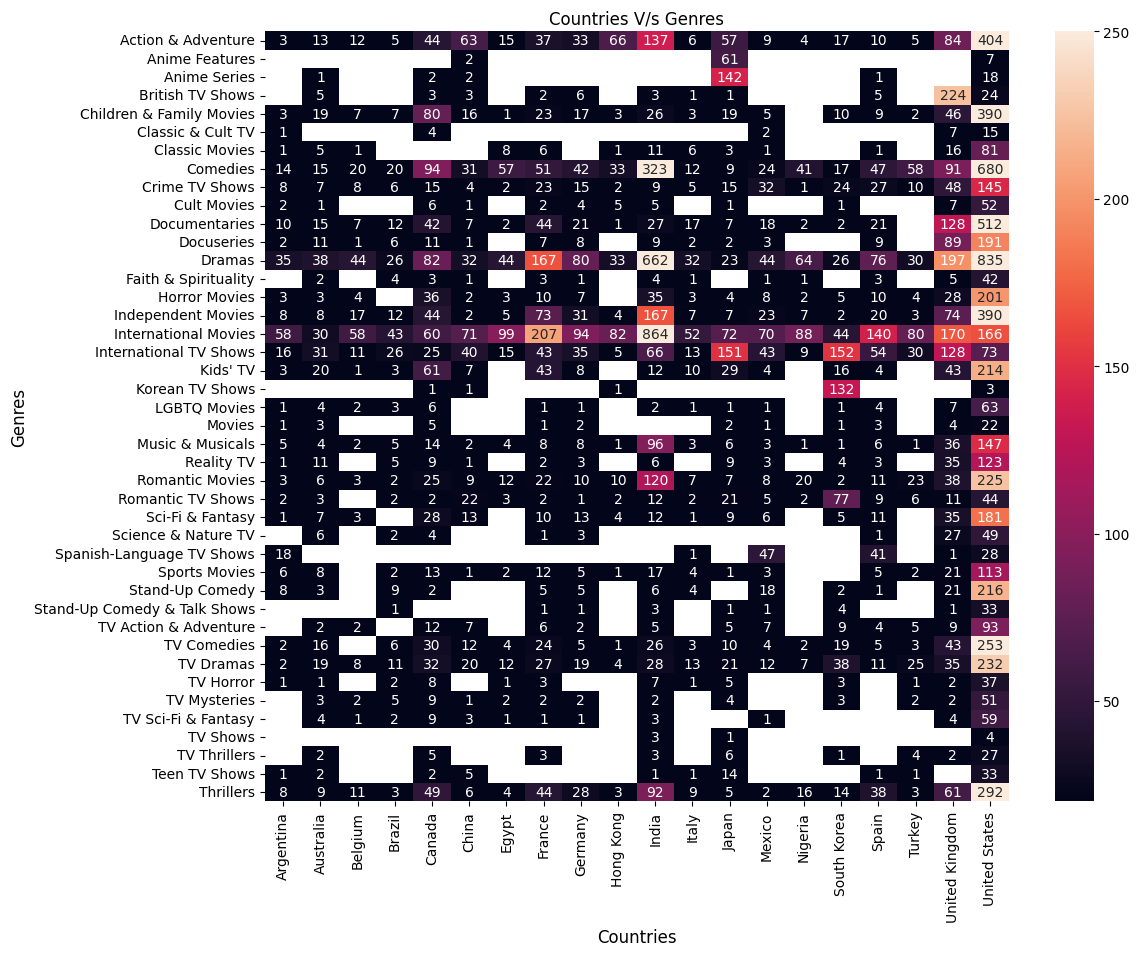

In [71]:
plt.figure(figsize = (12,10))
sns.heatmap(data = country_genre , annot = True , fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries V/s Genres' , fontsize = 12)

Popular genres across countries: Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers

Country-specific genres: Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan), Spanish TV Shows (Argentina, Mexico and Spain)

United States and UK have a good mix of almost all genres.

Maximum International movies are produced in India.

Text(0.5, 1.0, 'Countries V/s Rating')

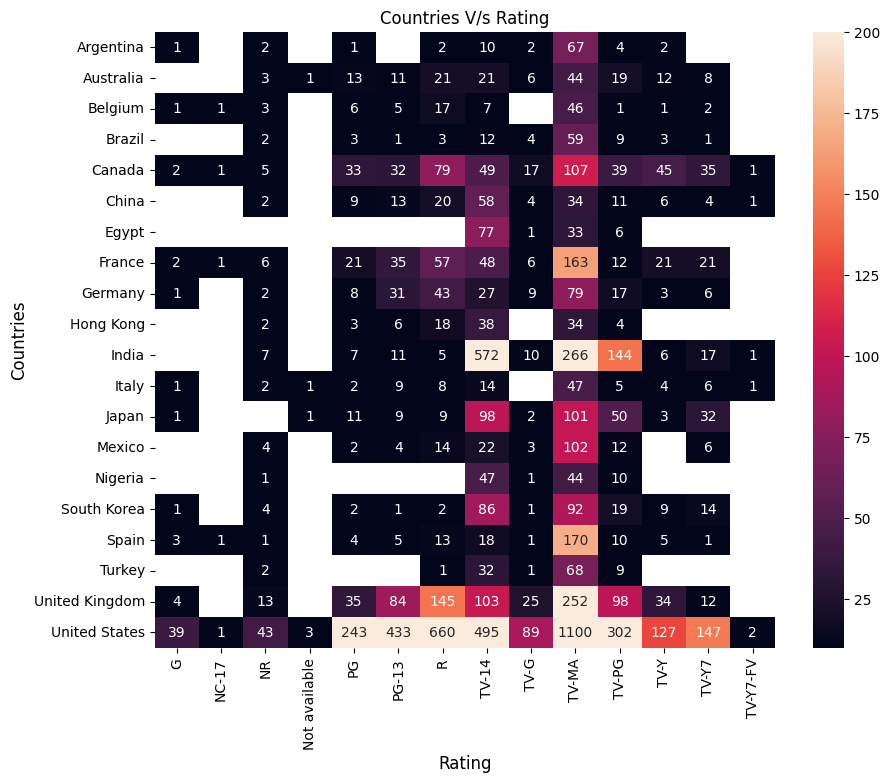

In [72]:
#5.2 Country-wise Rating of Content

x = top_20_country.merge(df , on = 'show_id').groupby(['country_x' , 'rating'])['show_id'].count().reset_index()
country_rating = x.pivot(index = ['country_x'] , columns = 'rating' , values = 'show_id')
plt.figure(figsize = (10,8))
sns.heatmap(data = country_rating , annot = True , fmt=".0f"  , vmin = 10 , vmax=200)
plt.ylabel('Countries' , fontsize = 12)
plt.xlabel('Rating' , fontsize = 12)
plt.title('Countries V/s Rating' , fontsize = 12)

Overall, Netflix has an large amount of adult content across all countries (TV-MA & TV-14).
India also has many titles rated TV-PG, other than TV-MA & TV-14.
Only US, Canada, UK, France and Japan have content for young audiences (TV-Y & TV-Y7).
There is scarce content for general audience (TV-G & G) across all countries except US.

In [73]:
# 5.3 The top actors by country
x = cast_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'cast'])['show_id'].count().reset_index()
x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)


,country,cast,show_id
49405,United States,Tara Strong,22
48330,United States,Samuel L. Jackson,22
40463,United States,Fred Tatasciore,21
35733,United States,Adam Sandler,20
41672,United States,James Franco,19


In [74]:
country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_actors = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

In [75]:
for i in country_list:
    new = x.loc[x['country'].isin([i])].sort_values('show_id' , ascending = False).head(5)
    top_5_actors = pd.concat( [top_5_actors , new] , ignore_index = True)

In [76]:
# top 5 actors in top countries and their movies/tv shows count
top_5_actors

,country,cast,show_id
0,United States,Tara Strong,22
1,United States,Samuel L. Jackson,22
2,United States,Fred Tatasciore,21
3,United States,Adam Sandler,20
4,United States,James Franco,19
5,India,Anupam Kher,40
6,India,Shah Rukh Khan,34
7,India,Naseeruddin Shah,31
8,India,Om Puri,29
9,India,Akshay Kumar,29


<Axes: xlabel='show_id', ylabel='cast'>

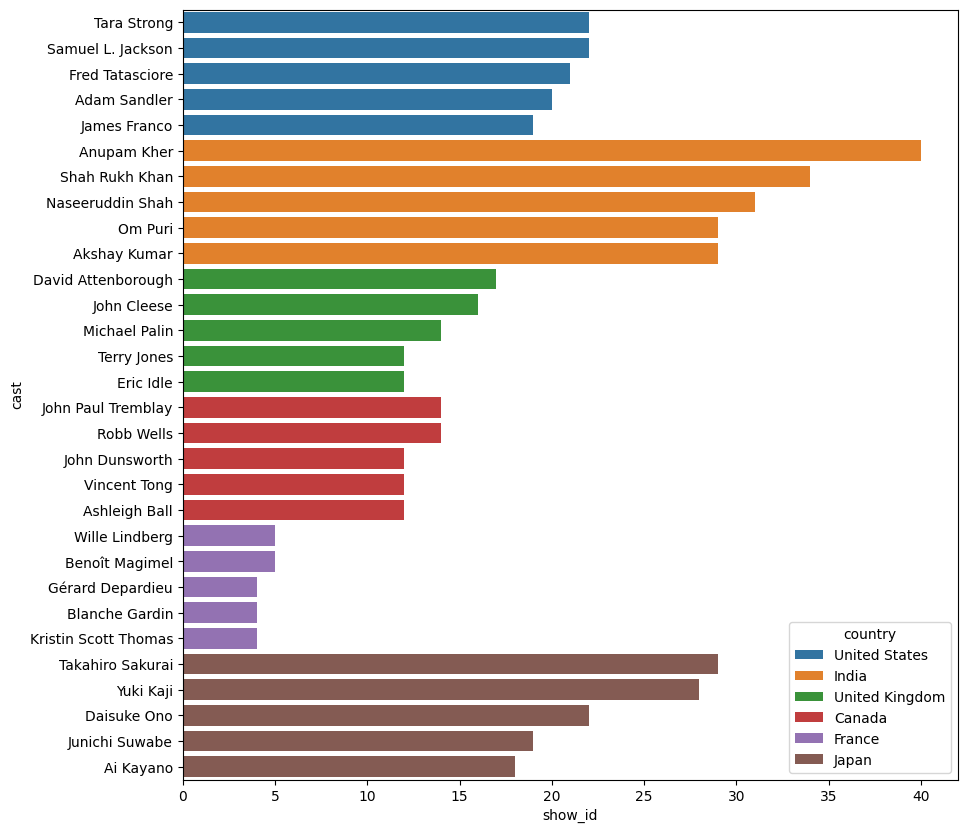

In [77]:
plt.figure(figsize = (10,10))
sns.barplot(data = top_5_actors , y = 'cast' , x = 'show_id' , hue = 'country')

In [78]:
genre_list = [ 'Children & Family Movies', 'Comedies','Dramas', 'International Movies', 'Documentaries' ,
              'International TV Shows', 'Sci-Fi & Fantasy', 'Thrillers', 'Horror Movies']

x = dir_tb.merge(genre_tb , on = 'show_id').groupby([ 'listed_in' , 'director',])['show_id'].count().reset_index()

top_5_dir = x.loc[x['listed_in'] == 'Action & Adventure'].sort_values('show_id' , ascending = False).head()

for i in genre_list:
    new = x.loc[x['listed_in'] == i].sort_values('show_id' , ascending = False).head()
    top_5_dir = pd.concat([top_5_dir , new])

top_5_dir

,listed_in,director,show_id
147,Action & Adventure,Don Michael Paul,9
550,Action & Adventure,S.S. Rajamouli,7
651,Action & Adventure,Toshiya Shinohara,7
215,Action & Adventure,Hidenori Inoue,7
606,Action & Adventure,Steven Spielberg,5
1215,Children & Family Movies,Rajiv Chilaka,22
1303,Children & Family Movies,Suhas Kadav,16
1211,Children & Family Movies,Prakash Satam,7
1241,Children & Family Movies,Robert Rodriguez,7
1288,Children & Family Movies,Steve Ball,6


In [79]:

x = genre_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'listed_in'])['show_id'].count().reset_index()
x.loc[x['country'] == 'United States'].sort_values('show_id' , ascending = False).head(5)

country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_genre = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = x.loc[x['country'] == i].sort_values('show_id' , ascending = False).head(5)
    top_5_genre = pd.concat( [top_5_genre , new] , ignore_index = True)

In [80]:
top_5_genre

,country,listed_in,show_id
0,United States,Dramas,835
1,United States,Comedies,680
2,United States,Documentaries,512
3,United States,Action & Adventure,404
4,United States,Independent Movies,390
5,India,International Movies,864
6,India,Dramas,662
7,India,Comedies,323
8,India,Independent Movies,167
9,India,Action & Adventure,137


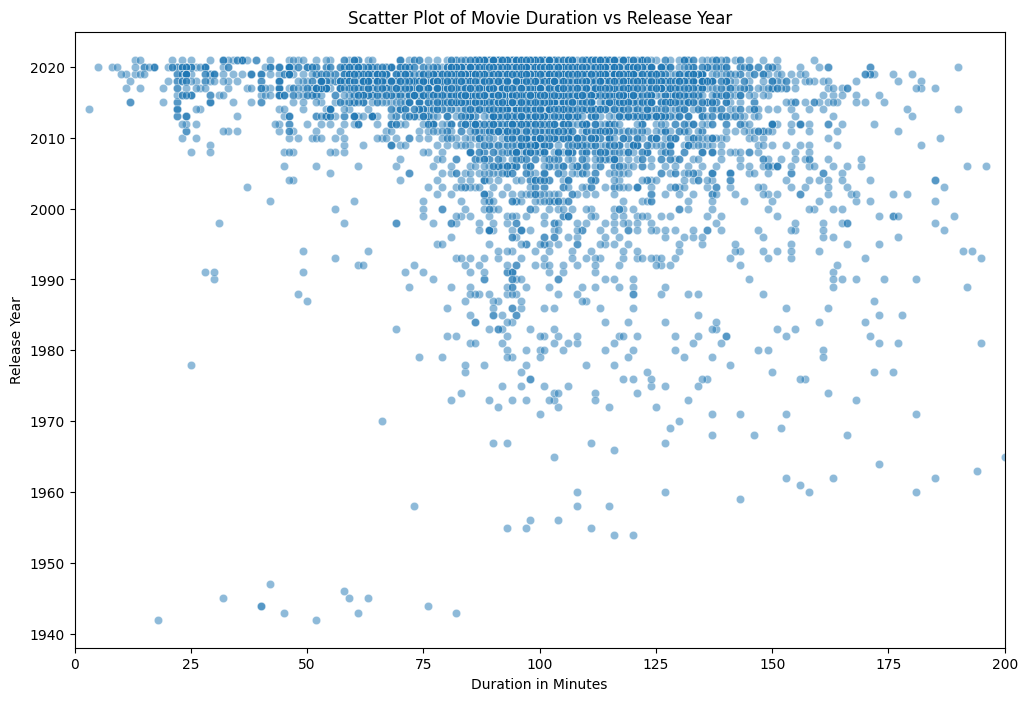

In [81]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=movies['duration_in_minutes'], y=movies['release_year'], alpha=0.5)

plt.xlim((0, 200))
plt.xlabel('Duration in Minutes')
plt.ylabel('Release Year')
plt.title('Scatter Plot of Movie Duration vs Release Year')
plt.show()

Observation
The movies shorter than 150 minutes duration have increased drastically after 2000 while movies longer than 150 minutes are not much popular.
There is a huge surge in the number of shorter duration movies (less than 75 mins) post 2010. Overall, Short movies have been popular in last 10 years.

Text(0.5, 1.0, 'Year and Month of Adding Shows on Netflix')

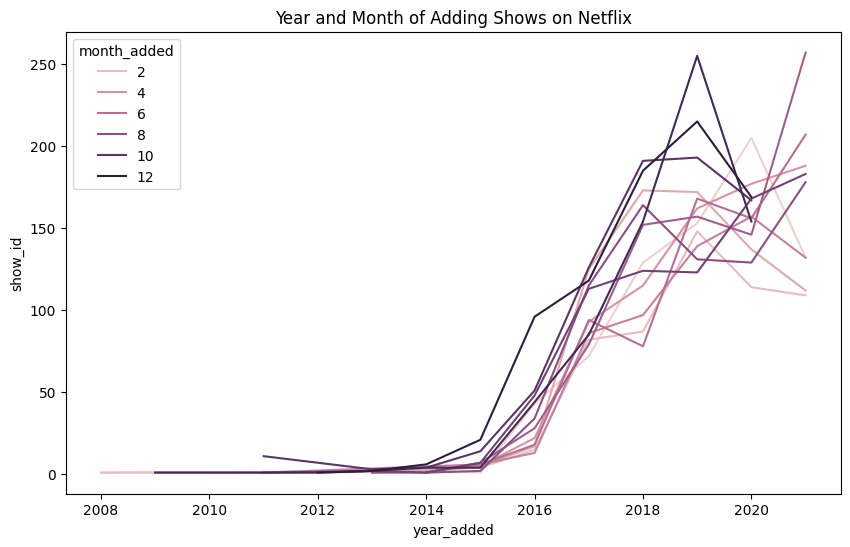

In [82]:
#5.7 What is the best time of the year when maximum content get added on the Netflix?
month_year = df.groupby(['year_added' , 'month_added'])['show_id'].count().reset_index()
plt.figure(figsize = (10,6))
sns.lineplot(data=month_year, x = 'year_added', y = 'show_id', hue='month_added')
plt.title('Year and Month of Adding Shows on Netflix')

# Insights based on Non-Graphical and Visual Analysis

Around 70% content on Netflix is Movies and around 30% content is TV shows.

The movies and TV shows uploading on the Netflix started from the year 2008, It had very lesser content till 2014.

Year 2015 marks the drastic surge in the content getting uploaded on Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix.

Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies.

Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly. Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.

Netflix has movies from variety of directors. Around 4993 directors have their movies or tv shows on Netflix.

Netflix has movies from total 122 countries, United States being the highset contributor with almost 37% of all the content.

The release year for shows is concentrated in the range 2005-2021.

various ratings of content is avaialble on netfilx, for the various viewers categories like kids, adults , families. Highest number of movies and TV shows are rated TV-MA (for mature audiences).

Content in most of the ratings is available in lesser quanitity except in US. Ratings like TV-Y7 , TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less avaialble in all countries except US.

International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.

Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.

Indian Actors have been acted in maximum movies on netflix. Top 5 actors are in India based on quantity of movies.

Shorter duration movies have been popular in last 10 years.


#Business Insights

Netflix have majority of content which is released after the year 2000. It is observed that the content older than year 2000 is very scarce on Netflix. Senior Citizen could be the target audience for such content, which is almost missing currently.

Maximum content (more than 80%) is
TV-MA - Content intended for mature audiences aged 17 and above.
TV-14 - Content suitable for viewers aged 14 and above.
TV-PG - Parental guidance suggested (similar ratings - PG-13 , PG)
R - Restricted Content, that may not be suitable for viewers under age 17.

These ratings' movies target Matured and Adult audience. Rest 20 % of the content is for kids aged below 13. It shows that Netflix is currently serving mostly Mature audiences or Children with parental guidance.

Most popular genres on Netflix are International Movies and TV Shows , Dramas , Comedies, Action & Adventure, Children & Family Movies, Thrillers.
Maximum content of Netflix which is around 75% , is coming from the top 10 countries. Rest of the world only contributes 25% of the content.

More countries can be focussed in future to grow the business.
Liking towards the shorter duration content is on the rise. (duration 75 to 150 minutes and seasons 1 to 3) This can be considered while production of new content on Netflix.

drop in content is seen across all the countries and type of content in year 2020 and 2021, possibly because of Pandemic.

#Recommendations

Very limited genres are focussed in most of the countries except US. It seems the current available genres suits best for US and few countries but maximum countries need some more genres which are highly popular in the region. eg. Indian Mythological content is highly popular.

We can create such more country specific genres and It might also be liked acorss the world just like Japanese Anime.

Country specific insights - The content need to be targetting the demographic of any country. Netflix can produce higher number of content in the perticular rating as per demographic of the country. Eg.
The country like India , which is highly populous , has maximum content available only in three rating TV-MA, TV-14 , TV-PG. It is unlikely to serve below 14 age and above 35 year age group .


